In [153]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=c905297c2e8cf4c6fa83def496937cd7800757efa76462d83a965d04b3423c67
  Stored in directory: /Users/eunsoo/Library/Caches/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [17]:
df = pd.read_excel('healthy.xlsx',index_col='가입자일련번호')
df

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [19]:
health= df.copy()

In [21]:
health['성별코드'].value_counts()

M    5138
F    4862
Name: 성별코드, dtype: int64

In [22]:
health['허리둘레'].value_counts()

80.0     411
84.0     364
82.0     345
86.0     339
81.0     333
        ... 
66.9       1
68.7       1
58.3       1
62.4       1
107.4      1
Name: 허리둘레, Length: 423, dtype: int64

In [26]:
health['흡연상태'].value_counts()

No        6231
NotNow    1926
Yes       1841
Name: 흡연상태, dtype: int64

In [24]:
health['음주여부'].value_counts()

Yes    5819
No     4180
Name: 음주여부, dtype: int64

In [28]:
#위 세 개 전체 값들의 차이가 있으므로 결측치를 제거해 준다.
healthy = health.dropna(subset = ['성별코드','허리둘레','흡연상태','음주여부'])

In [53]:
man = healthy['성별코드'].isin(['M'])
wom = healthy['성별코드'].isin(['W']) 

In [90]:
healthy.assign(bmiset= healthy['체중(5Kg 단위)']*10000/(healthy['신장(5Cm단위)']*healthy['신장(5Cm단위)']))


,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,bmiset
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,22.892820
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,21.484375
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,31.250000


In [93]:
healthy.query('성별코드 =="M"')

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
6,2020,27,M,9,185,85,94.0,1.2,1.2,1,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
7,2020,44,M,9,165,80,93.0,0.8,0.7,1,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
8,2020,41,M,13,160,65,92.0,0.5,0.5,1,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,2020,11,M,16,155,45,70.0,0.1,0.7,1,...,1.4,20.0,13.0,16.0,No,No,0,NaN,NaN,12/29/2021
9993,2020,26,M,15,170,70,88.0,0.7,0.8,2,...,1.2,23.0,17.0,36.0,No,Yes,0,NaN,NaN,12/29/2021
9994,2020,30,M,12,165,55,81.7,1.0,0.7,1,...,0.7,25.0,30.0,72.0,No,Yes,0,NaN,NaN,12/29/2021


#### **중요
assign 함수를 썼을때는 값을 보여주지만 새로운 column이 생긴 것이 아니어서
후에 사용하려하니 bmiset 이 지속 없다고 떴다..따라서 query 함수 사용도 어려웠음""" 



In [109]:
healthy['bmiset'] = (healthy['체중(5Kg 단위)']*10000/(healthy['신장(5Cm단위)']*healthy['신장(5Cm단위)']))
healthy

/var/folders/83/zqkbfpfj1n909jttv13gwpvr0000gn/T/ipykernel_511/2457365409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy['bmiset'] = (healthy['체중(5Kg 단위)']*10000/(healthy['신장(5Cm단위)']*healthy['신장(5Cm단위)']))


,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,bmiset
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,22.892820
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,21.484375
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,31.250000


In [154]:
df['bmi']='' #column에 bmi 추가 후 초기화
healthy.loc[healthy['bmiset'] <18.5, 'bmi'] ='underweight'
#loc문법 활용으로 bmiset이 18.5보다 작으면 bmi 열에 '정상' 으로 기록
healthy.loc[(healthy['bmiset']>=18.5) & (healthy['bmiset']<25), 'bmi'] ='normal'
#healthy['column'] 이 기본 형태이고 계산식이 두 개 이상이기에 ()을 각각 넣어준다.
healthy.loc[(healthy['bmiset']>=25) & (healthy['bmiset']<30), 'bmi'] ='overweight'
healthy.loc[healthy['bmiset']>=30, 'bmi'] ='obesity'

In [155]:
#필요한 음주,흡연,bmi 데이터만 뽑아 새로운 프레임을 만든다.
health_final = healthy.iloc[:,[24,25,31]]
health_final

,흡연상태,음주여부,bmi
가입자일련번호,,,
1,No,No,normal
2,No,No,overweight
3,No,No,normal
4,No,No,overweight
5,No,No,normal
...,...,...,...
9996,No,Yes,normal
9997,No,Yes,normal
9998,No,No,obesity


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


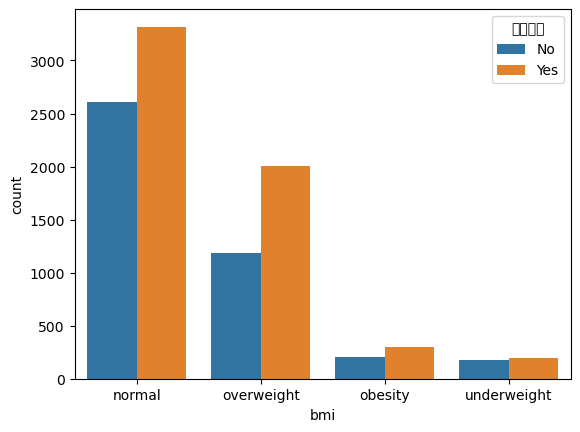

In [140]:
alchol = sns.countplot(data= health_final, x='bmi', hue='음주여부')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


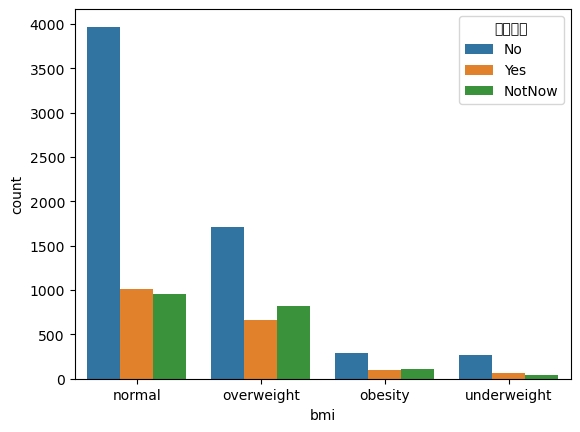

In [167]:
smoke = sns.countplot(data= healthy, x='bmi', hue='흡연상태')

[(1.0, 2000.0)]

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.

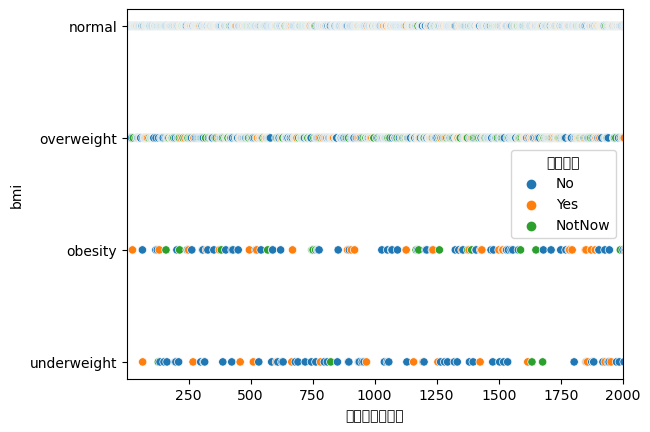

In [188]:
sns.scatterplot(data=healthy, x= '가입자일련번호', y = 'bmi', 
                hue = '흡연상태').set(xlim = (1,2000))